In [1]:
import torch
from torchvision import transforms
import matplotlib.pyplot as plt

In [2]:
# %cd ..
from utils.visualization import show_plt_keypoints
from animal_keypoints_dataset import AKD
from utils.transforms import RandomRotation, RandomFlip, RandomRatioCrop
# %cd ./data_loading

In [3]:
image_size = (128, 128)
data = AKD(
    root='./',
    split='train',
    download=True,
)

0 480x281 torch.Size([16, 2])
1 480x318 torch.Size([16, 2])
2 480x320 torch.Size([16, 2])
3 400x320 torch.Size([16, 2])
4 480x320 torch.Size([16, 2])
5 318x320 torch.Size([16, 2])
6 825x703 torch.Size([16, 2])
7 480x252 torch.Size([16, 2])
8 3024x4032 torch.Size([16, 2])


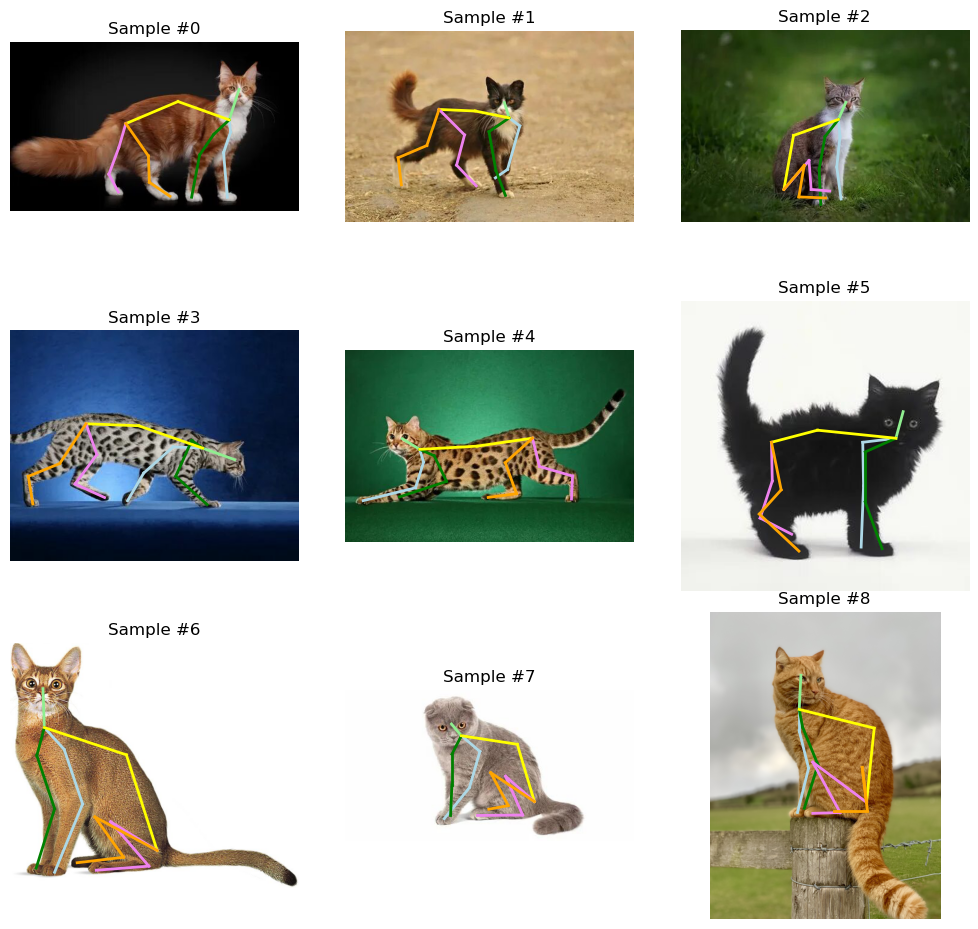

In [4]:
fig = plt.figure(figsize=(10, 10))

for i in range(9):
    sample = data[i]

    print(i, '{}x{}'.format(sample['image'].width, sample['image'].height),
          sample['keypoints'].shape)

    ax = plt.subplot(3, 3, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_plt_keypoints(sample['image'], sample['keypoints'], True, ax)
plt.show()

In [5]:
all_tform = transforms.Compose([
    RandomFlip(0.5, 0.5),
    RandomRatioCrop(0.05, 0.05, 0.95, 0.95),
    RandomRotation((-15, 15)),
])

img_tform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor()
])

data = AKD(
    root='./',
    split='train',
    download=True,
    all_transform=all_tform,
    image_transform=img_tform,
    heatmap_size=(45, 45),
    produce_visibility=True
)

0 torch.float32 torch.Size([3, 128, 128]) torch.Size([16, 3])
1 torch.float32 torch.Size([3, 128, 128]) torch.Size([16, 3])
2 torch.float32 torch.Size([3, 128, 128]) torch.Size([16, 3])
3 torch.float32 torch.Size([3, 128, 128]) torch.Size([16, 3])
4 torch.float32 torch.Size([3, 128, 128]) torch.Size([16, 3])
5 torch.float32 torch.Size([3, 128, 128]) torch.Size([16, 3])
6 torch.float32 torch.Size([3, 128, 128]) torch.Size([16, 3])
7 torch.float32 torch.Size([3, 128, 128]) torch.Size([16, 3])
8 torch.float32 torch.Size([3, 128, 128]) torch.Size([16, 3])


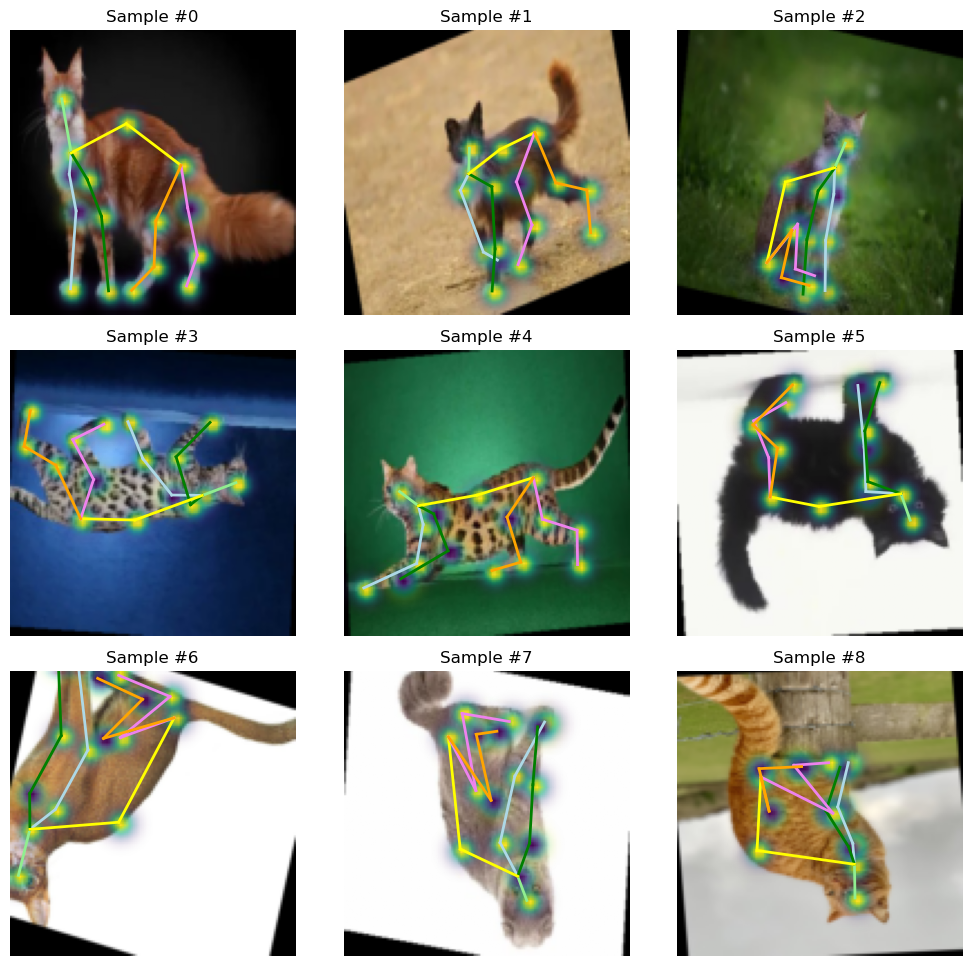

In [6]:
hmap_resize = transforms.Resize(image_size)
fig = plt.figure(figsize=(10, 10))

for i in range(9):
    sample = data[i]
    print(i,
          sample['image'].dtype,
          sample['image'].shape,
          sample['keypoints'].shape)
    ax = plt.subplot(3, 3, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_plt_keypoints(sample['image'].movedim(0, -1), sample['keypoints'], True, ax)
    for i in range(sample['heatmap'].shape[0]):
        hmap = hmap_resize(sample['heatmap'][i, :, :].unsqueeze(0)).squeeze()
        ax.imshow(hmap, alpha=hmap.abs())
plt.show()